<a href="https://colab.research.google.com/github/Aniket-Kumar-7/Machine-Learning/blob/main/Machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings

warnings.filterwarnings("ignore")
data=pd.read_csv(r'/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#EDA

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

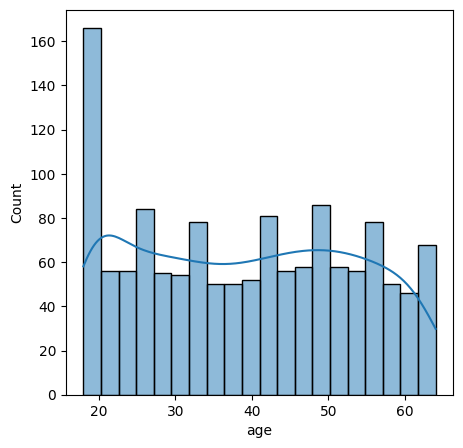

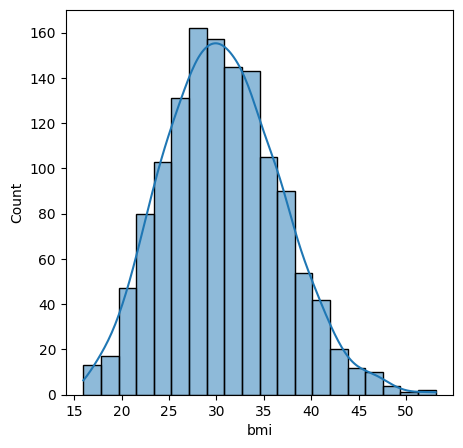

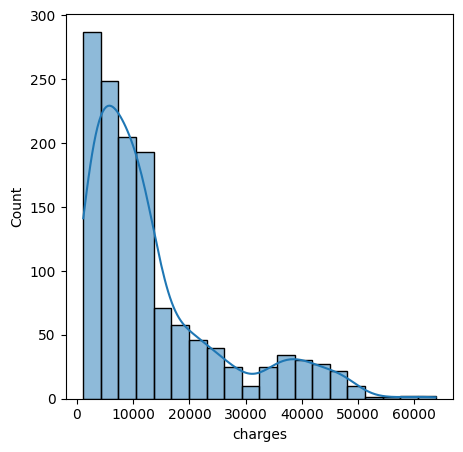

In [ ]:
numeric_columns=['age','bmi','charges']
for col in numeric_columns:
  plt.figure(figsize=(5,5))
  sbn.histplot(data[col],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

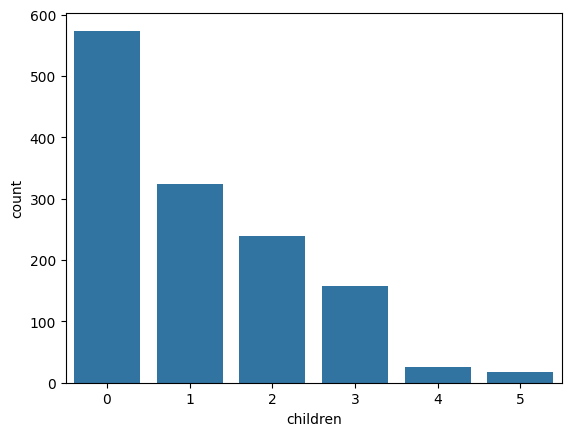

In [ ]:
sbn.countplot(x=data['children'])

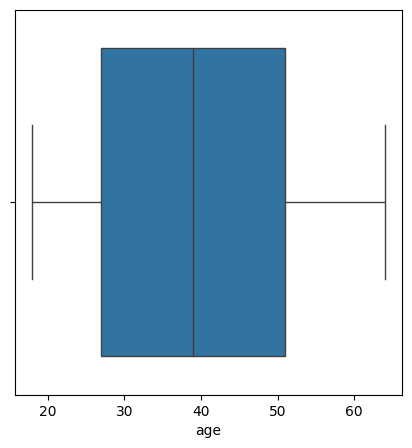

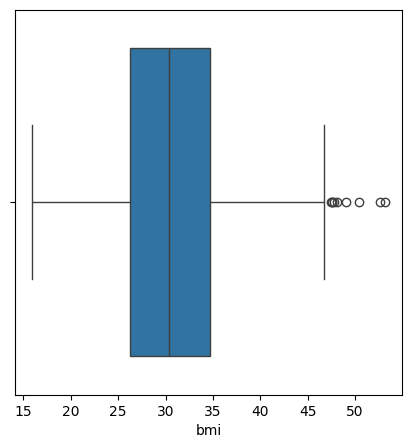

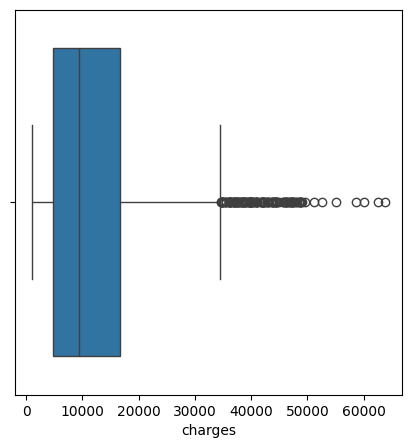

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(5,5))
  sbn.boxplot(x=data[col])

<Axes: >

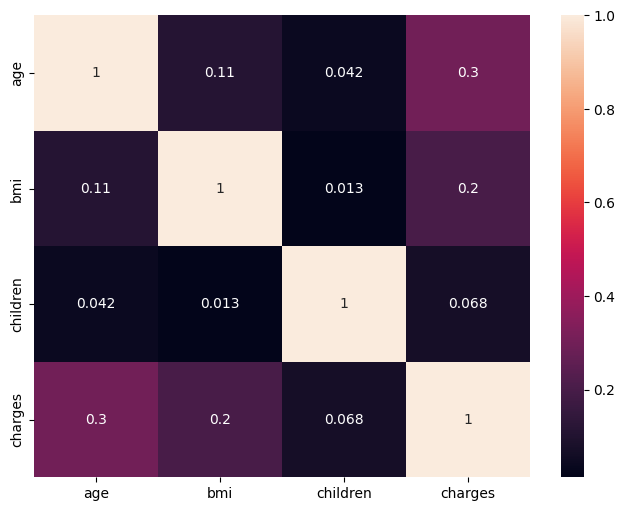

In [ ]:
plt.figure(figsize=(8,6))
sbn.heatmap(data.corr(numeric_only=True),annot=True)

#Data Cleaning and Preprocessing

In [ ]:
df_cleaned=data.copy()
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.shape

(1338, 7)

In [ ]:
df_cleaned[df_cleaned.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.shape

(1337, 7)

In [ ]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.shape

(1338, 7)

In [ ]:
df_cleaned.shape
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_cleaned["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df_cleaned["sex"]=df_cleaned["sex"].replace({"male":1,"female":0})

In [ ]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [ ]:
df_cleaned["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df_cleaned["smoker"]=df_cleaned["smoker"].replace({"yes":1,"no":0})

In [ ]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df_cleaned.rename(columns={
    "sex":"is_male",
    "smoker":"is_smoker"
},inplace=True)

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df_cleaned["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df_cleaned=pd.get_dummies(df_cleaned,columns=["region"],drop_first=True)

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [ ]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


In [ ]:
df_cleaned["Bmi_category"]=pd.cut(df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,float('inf')],labels=['Underweight','Normal','Overweight','Obese'])

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obese
2,28,1,33,3,0,4449,0,1,0,Obese
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,Obese
1334,18,0,31,0,0,2205,0,0,0,Obese
1335,18,0,36,0,0,1629,0,1,0,Obese
1336,21,0,25,0,0,2007,0,0,1,Overweight


In [ ]:
df_cleaned=pd.get_dummies(df_cleaned,columns=["Bmi_category"],drop_first=True)

In [ ]:
df_cleaned['Bmi_category_Overweight']=df_cleaned['Bmi_category_Overweight'].astype(int)

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,False,1,False
1,18,1,33,1,0,1725,0,1,0,False,0,True
2,28,1,33,3,0,4449,0,1,0,False,0,True
3,33,1,22,0,0,21984,1,0,0,True,0,False
4,32,1,28,0,0,3866,1,0,0,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,False,0,True
1334,18,0,31,0,0,2205,0,0,0,False,0,True
1335,18,0,36,0,0,1629,0,1,0,False,0,True
1336,21,0,25,0,0,2007,0,0,1,False,1,False


In [ ]:
cols=["Bmi_category_Normal","Bmi_category_Overweight","Bmi_category_Obese"]
df_cleaned[cols]=df_cleaned[cols].astype("int")

In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,0,0,1
1334,18,0,31,0,0,2205,0,0,0,0,0,1
1335,18,0,36,0,0,1629,0,1,0,0,0,1
1336,21,0,25,0,0,2007,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
col=["age","bmi","children"]
scalar=StandardScaler()
df_cleaned[col]=scalar.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [ ]:
selected_features=['age','bmi','children','is_male','is_smoker','region_northwest','region_southeast','region_southwest','Bmi_category_Normal','Bmi_category_Overweight','Bmi_category_Obese']

In [ ]:
from scipy.stats import pearsonr

In [ ]:
correlation={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}

In [ ]:
correlation_df=pd.DataFrame(list(correlation.items()),columns=['Features','Pearson_Correlation'])
correlation_df.sort_values(by='Pearson_Correlation',ascending=False)

,Features,Pearson_Correlation
4,is_smoker,0.787234
0,age,0.298309
10,Bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
3,is_male,0.058046
5,region_northwest,-0.038695
7,region_southwest,-0.043637
8,Bmi_category_Normal,-0.104042


In [ ]:
df_cleaned

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [ ]:
categorical_features=['is_male','is_smoker','region_northwest','region_southeast','region_southwest','Bmi_category_Normal','Bmi_category_Overweight','Bmi_category_Obese']

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
alpha = 0.05

df_cleaned['charges_bin']=pd.qcut(df_cleaned['charges'],q=4,labels=False)
chi2_results={}

for col in categorical_features:
  contingency=pd.crosstab(df_cleaned[col],df_cleaned['charges_bin'])
  chi2_stat,p_value,_,_=chi2_contingency(contingency)
  decision='Reject Null (Keep Features)' if p_value<alpha else 'Accept Null(Drop Features)'
  chi2_results[col]={
      'chi2_statistic':chi2_stat,
      'p_value':p_value,
      'Decision':decision
  }
chi2_df=pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Features)
region_southeast,15.998167,0.001135,Reject Null (Keep Features)
is_male,10.258784,0.01649,Reject Null (Keep Features)
Bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Features)
region_southwest,5.091893,0.165191,Accept Null(Drop Features)
Bmi_category_Overweight,4.25149,0.235557,Accept Null(Drop Features)
Bmi_category_Normal,3.708088,0.29476,Accept Null(Drop Features)
region_northwest,1.13424,0.768815,Accept Null(Drop Features)


In [ ]:
final_df=df_cleaned[['is_smoker','region_southeast','is_male','Bmi_category_Obese','bmi','age','charges','children']];

In [ ]:
final_df

,is_smoker,region_southeast,is_male,Bmi_category_Obese,bmi,age,charges,children
0,1,0,0,0,-0.517949,-1.440418,16884,-0.909234
1,0,1,1,1,0.462463,-1.511647,1725,-0.079442
2,0,1,1,1,0.462463,-0.799350,4449,1.580143
3,0,0,1,0,-1.334960,-0.443201,21984,-0.909234
4,0,0,1,0,-0.354547,-0.514431,3866,-0.909234
...,...,...,...,...,...,...,...,...
1333,0,0,1,1,-0.027743,0.767704,10600,1.580143
1334,0,0,0,1,0.135659,-1.511647,2205,-0.909234
1335,0,1,0,1,0.952670,-1.511647,1629,-0.909234
1336,0,0,0,0,-0.844753,-1.297958,2007,-0.909234
